# Split 1

## Hebbian learning (3.1)

In [1]:
import numpy as np

patterns = np.array(
    [
        [-1, -1, 1, -1, 1, -1, -1, 1],
        [-1, -1, -1, -1, -1, 1, -1, -1],
        [-1, 1, 1, -1, -1, 1, -1, 1],
    ]
)

cues = np.array(
    [
        [1, -1, 1, -1, 1, -1, -1, 1],
        [1, 1, -1, -1, -1, 1, -1, -1],
        [1, 1, 1, -1, 1, 1, -1, 1],
    ]
)

In [2]:
from tools import HopfieldNetwork

h = HopfieldNetwork(8)
h.fit(patterns)

h.recall(cues)

array([[-1, -1,  1, -1,  1, -1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1]])

### Find all attractors

In [3]:
import numpy as np

states = tuple([[1, -1]] * 8)
states = np.array(np.meshgrid(*states)).T.reshape(-1, 8)

h = HopfieldNetwork(8)
h.fit(patterns)

out = h.recall(states)
attractors= np.unique(out, axis=0)

print(f"There are {len(attractors)} attractors, {len(attractors) - len(patterns)} of them are spurious.")

correct_attractor = np.array([cue.tolist() in patterns.tolist() for cue in out])
print(f"{correct_attractor.sum()} of {len(states)} possible patterns converge to a correct attractor.")

There are 14 attractors, 11 of them are spurious.
82 of 256 possible patterns converge to a correct attractor.


### Error in patterns

In [4]:
from scipy.spatial.distance import hamming

state_distances = []

for state in states:
    dist = []
    for pattern in patterns:
        dist.append(hamming(pattern, state))
    state_distances.append(dist)

state_distances = np.array(state_distances)

In [5]:
import pandas as pd

cols = ["Attractor", "d0", "d1", "d2"]
data = []

for i, state in enumerate(states):
    attractor = out[i]
    pattern = np.where((patterns == attractor).all(axis=1))[0]
    pattern = pattern.item() if len(pattern) == 1 else -1

    data.append([pattern, state_distances[i][0], state_distances[i][1], state_distances[i][2]])

df = pd.DataFrame(data, columns=cols)

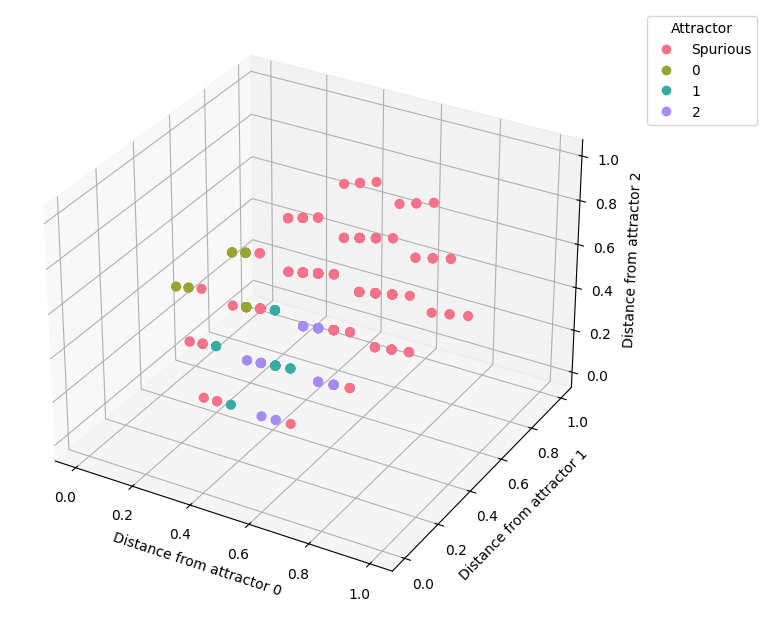

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 4).as_hex())

# plot
sc = ax.scatter(df["d0"], df["d1"], df["d2"], s=40, c=df["Attractor"], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Distance from attractor 0')
ax.set_ylabel('Distance from attractor 1')
ax.set_zlabel('Distance from attractor 2')

# legend
lines, labels = sc.legend_elements()
labels[0] = "Spurious"
plt.legend(handles=lines, labels=labels,title="Attractor" , bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("./imgs/distance_attractor.pdf", bbox_inches='tight')

In [7]:
df.groupby("Attractor", as_index=False).agg(["mean", "std", "count"])

Attractor        d0                        d1                        d2  \
                 mean       std count      mean       std count      mean   
0        -1  0.541667  0.175923   174  0.541667  0.175923   174  0.560345   
1         0  0.206250  0.073393    20  0.506250  0.063802    20  0.481250   
2         1  0.506250  0.063802    20  0.206250  0.073393    20  0.481250   
3         2  0.464286  0.096768    42  0.464286  0.096768    42  0.267857   

                   
        std count  
0  0.156578   174  
1  0.109387    20  
2  0.109387    20  
3  0.097887    42

## Sequential update

In [8]:
import pandas as pd

data = pd.read_csv("./pict.dat", header=None).values
data = data.reshape((-1, 1024))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def display_pattern(pattern: np.ndarray, filename: str):
    pattern = pattern.reshape(32, 32)
    plt.imshow(pattern, interpolation="nearest", cmap="gray")
    plt.title("Pattern")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

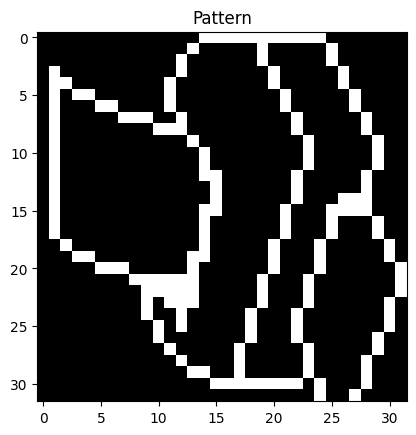

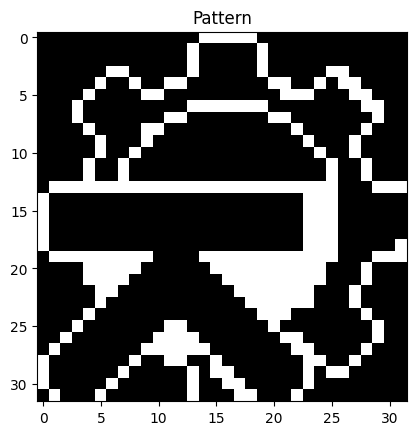

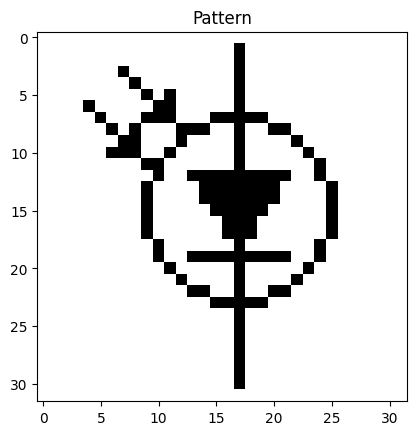

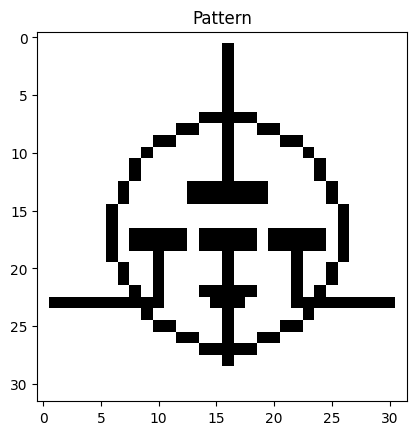

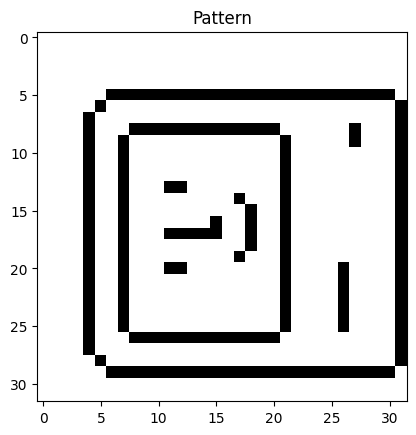

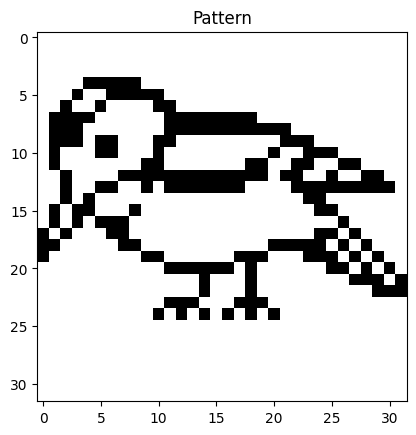

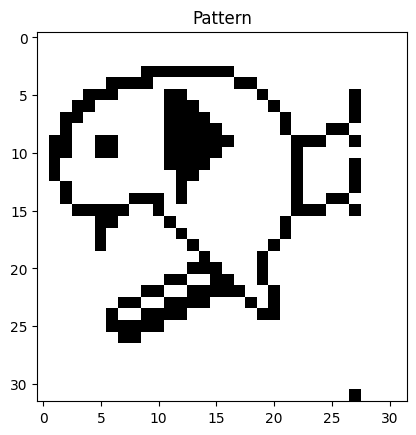

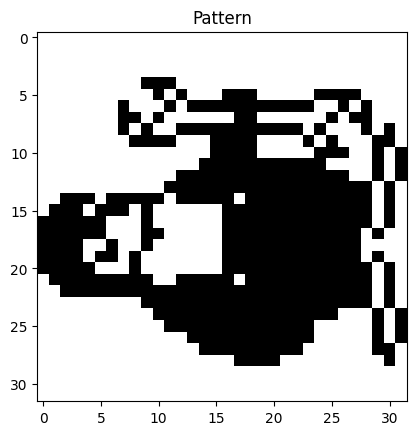

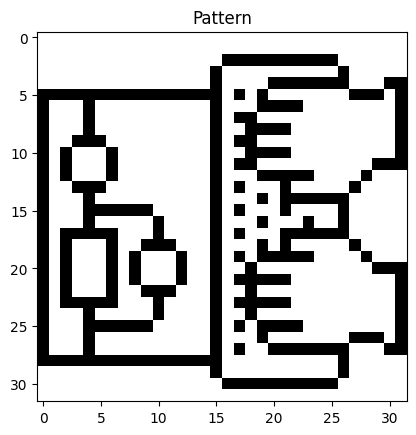

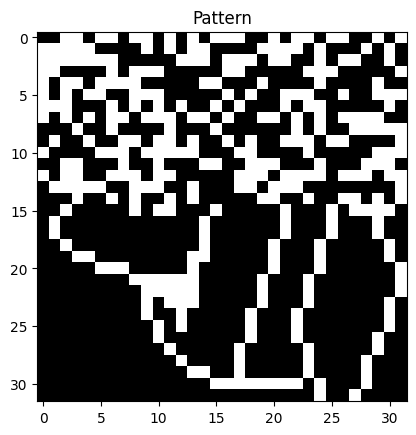

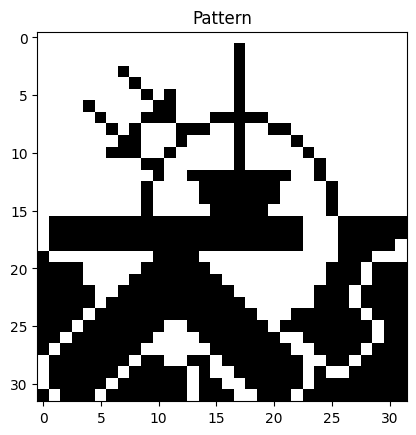

In [10]:
for i, pattern in enumerate(data):
    display_pattern(pattern, f"./imgs/p{i+1}.pdf")

### Stability

In [11]:
from tools import HopfieldNetwork

h = HopfieldNetwork(1024, 50)
h.fit(data[:3])

out = h.recall(data[:3])
(data[:3] == out).all()

True

### Recall degraded pattern

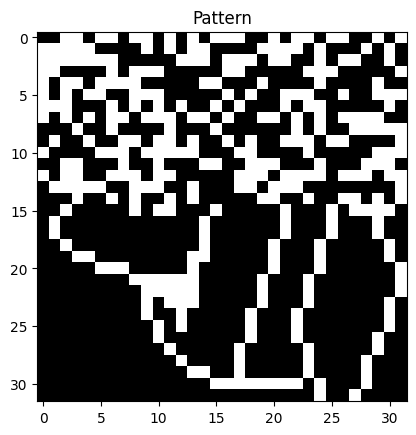

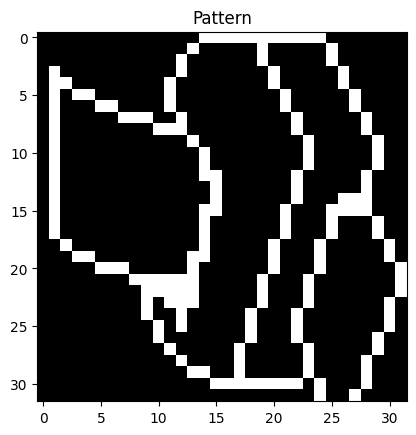

In [12]:
h.recall(data[9].reshape(1, 1024))

for i, partial in enumerate(h.detailed_history):
    display_pattern(partial["state"], f"./imgs/p10_to_p1_{i}.pdf")

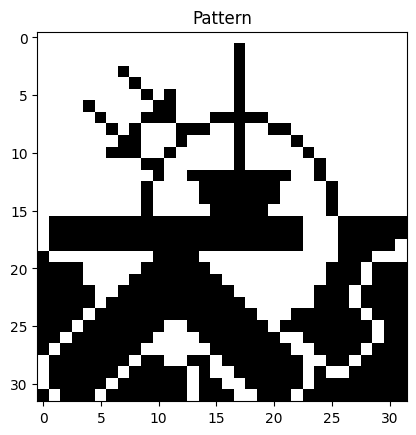

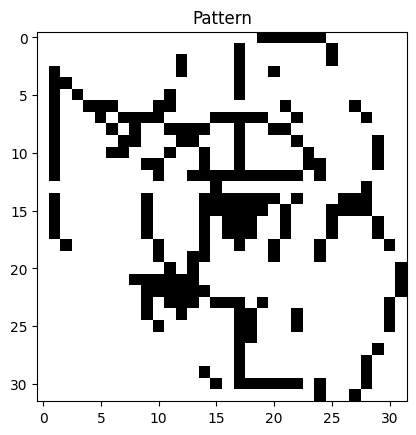

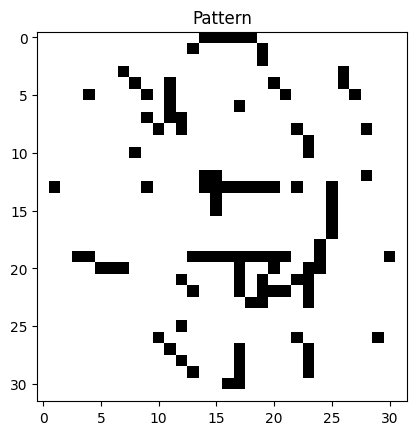

In [13]:
h.recall(data[10].reshape(1, 1024))

for i, partial in enumerate(h.detailed_history):
    display_pattern(partial["state"], f"./imgs/p11_to_p2_{i}.pdf")

### Randomize units

In [14]:
from tools import HopfieldNetwork

h = HopfieldNetwork(1024, 1000, sequential=True)
h.fit(data[:3])

Epoch: 0 (step 0)


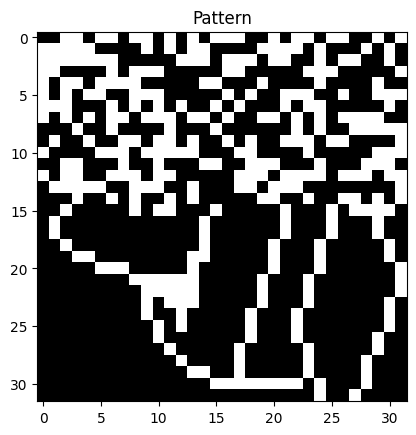

Epoch: 0 (step 100)


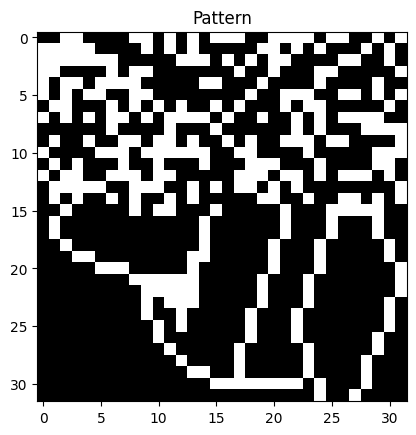

Epoch: 0 (step 200)


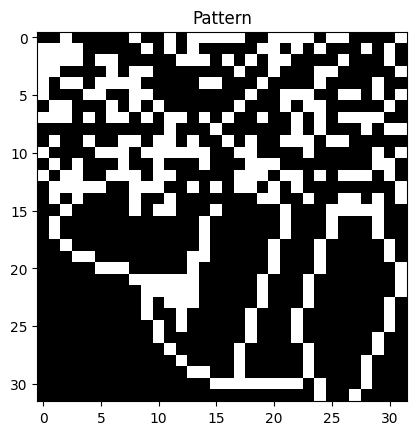

Epoch: 0 (step 300)


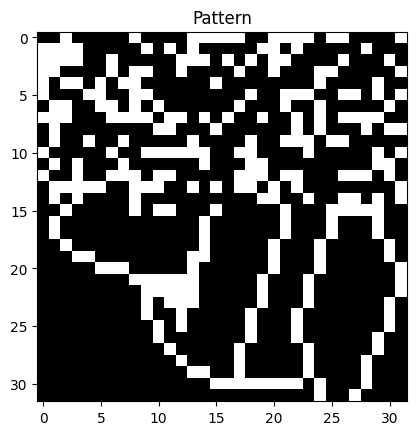

Epoch: 0 (step 400)


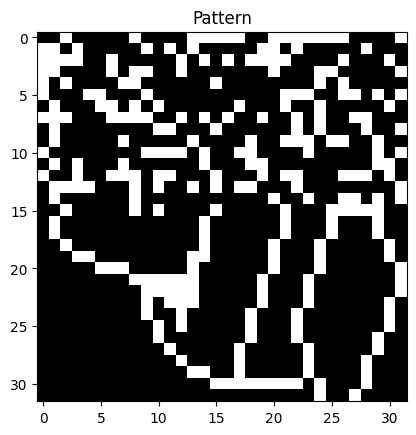

Epoch: 0 (step 500)


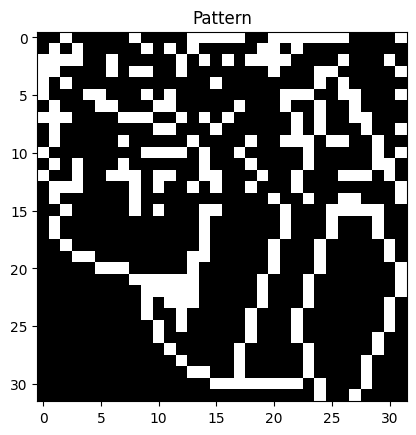

Epoch: 0 (step 600)


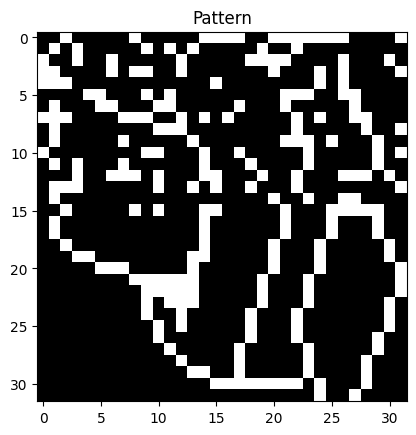

Epoch: 0 (step 700)


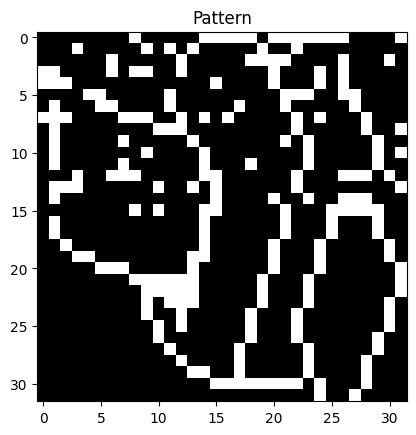

Epoch: 0 (step 800)


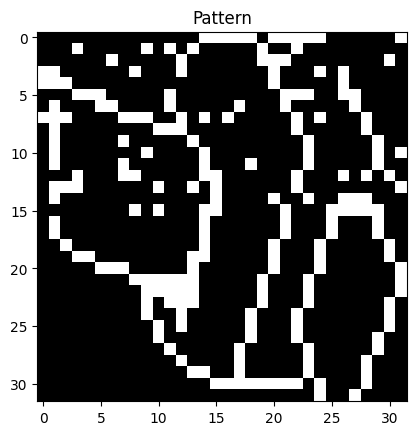

Epoch: 0 (step 900)


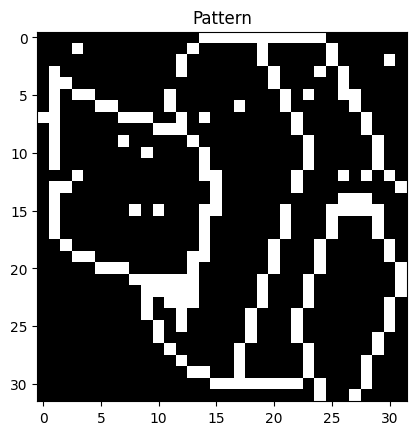

Epoch: 0 (step 1000)


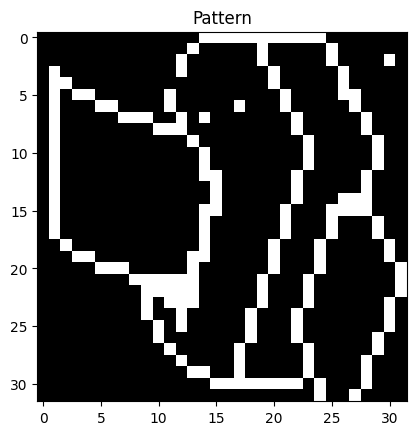

Epoch: 1 (step 1100)


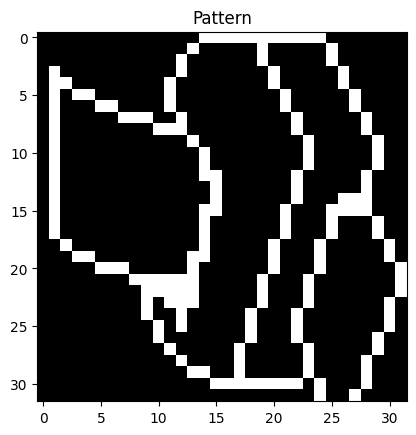

Epoch: 1 (step 1200)


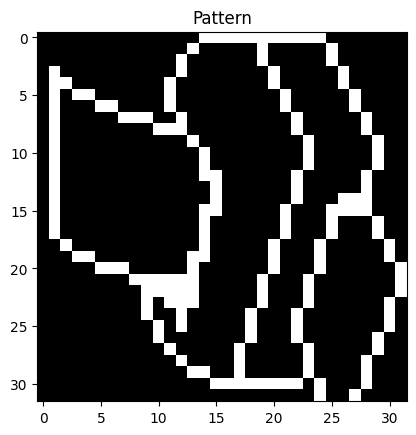

Epoch: 1 (step 1300)


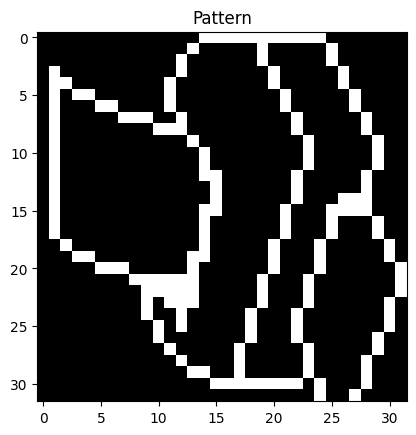

Epoch: 1 (step 1400)


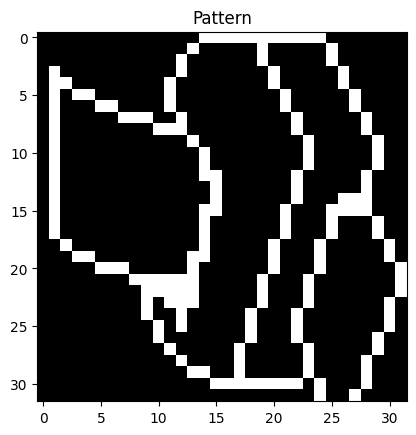

Epoch: 1 (step 1500)


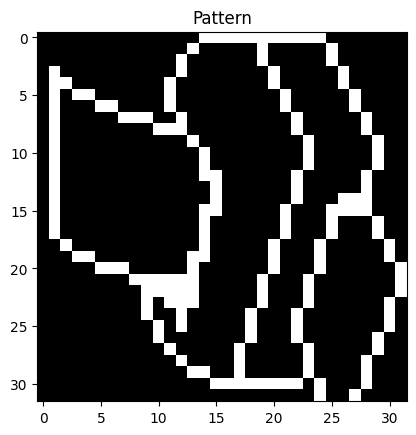

Epoch: 1 (step 1600)


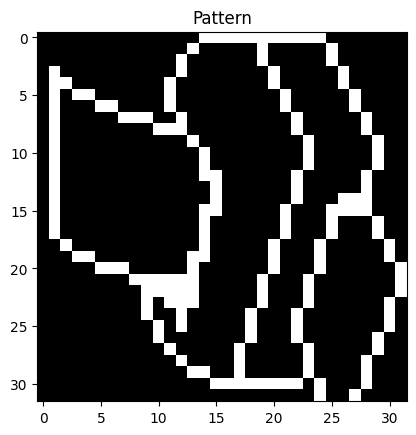

Epoch: 1 (step 1700)


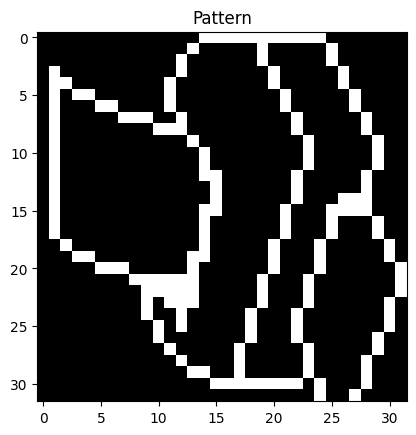

Epoch: 1 (step 1800)


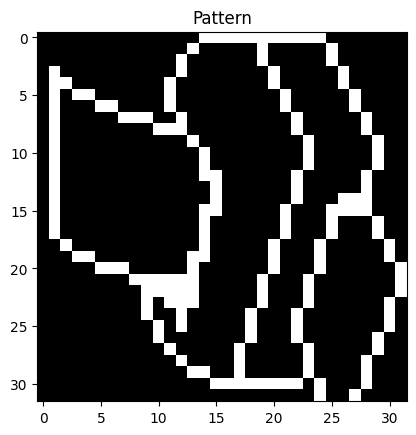

Epoch: 1 (step 1900)


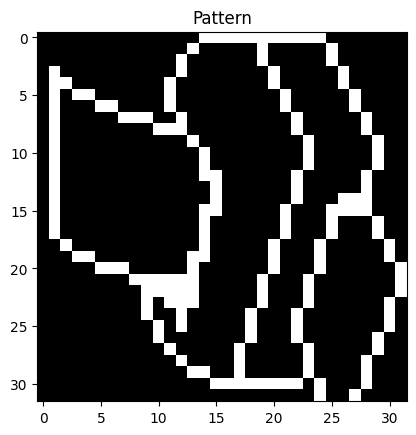

Epoch: 1 (step 2000)


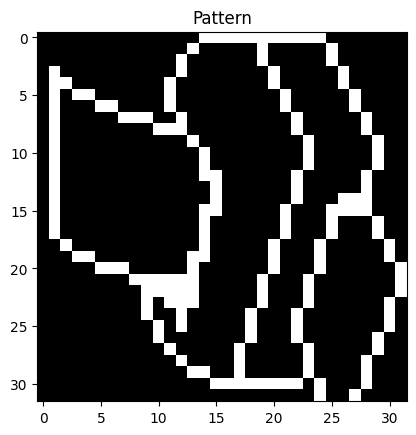

In [15]:
h.recall(data[9].reshape(1, 1024))

for i, partial in enumerate(h.detailed_history):
    if i % 100 == 0:
        print(f"Epoch: {partial['epoch']} (step {i})")
        display_pattern(partial["state"], f"./imgs/sequential_p10_to_p1_{i}.pdf")

Epoch: 0 (step 0)


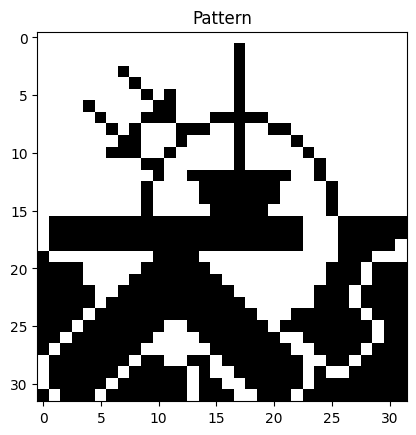

Epoch: 0 (step 100)


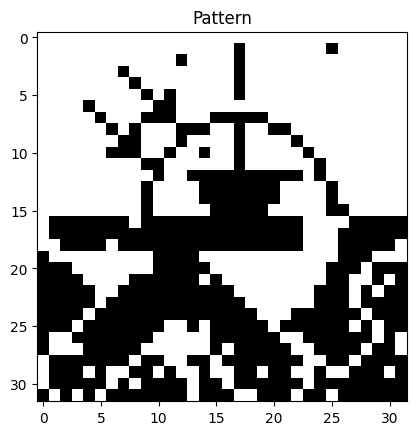

Epoch: 0 (step 200)


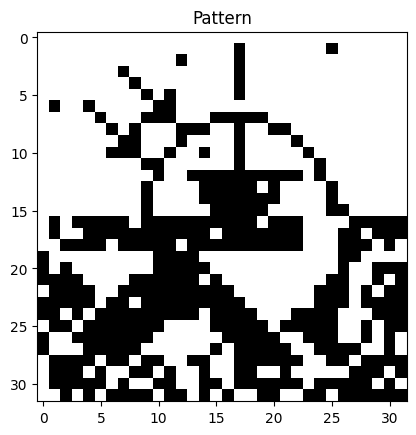

Epoch: 0 (step 300)


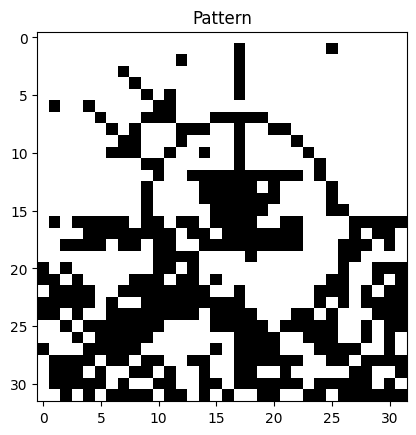

Epoch: 0 (step 400)


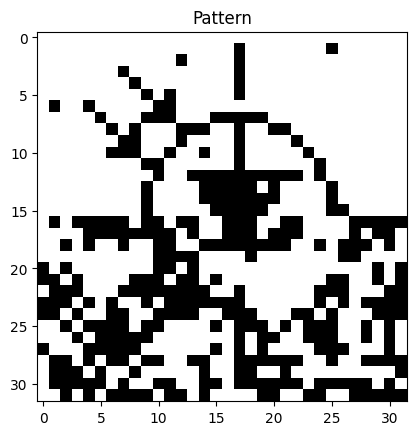

Epoch: 0 (step 500)


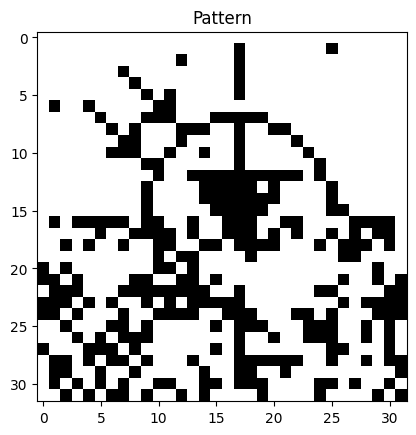

Epoch: 0 (step 600)


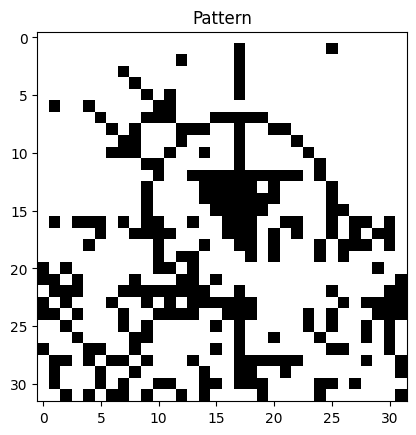

Epoch: 0 (step 700)


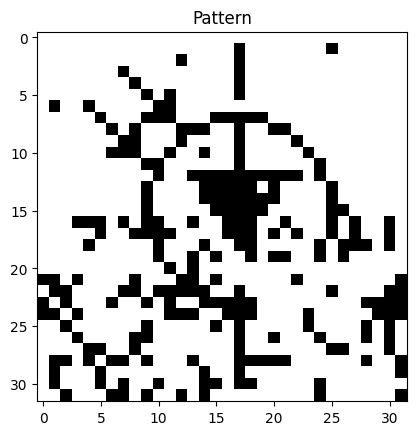

Epoch: 0 (step 800)


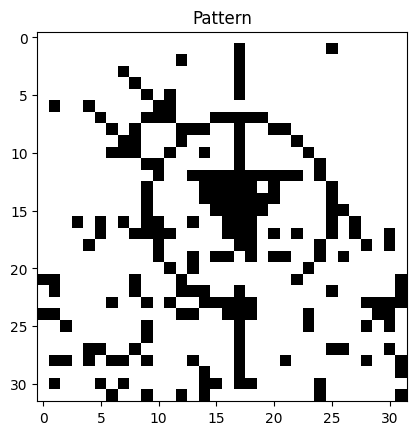

Epoch: 0 (step 900)


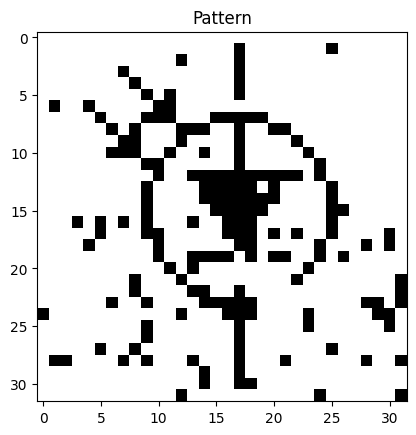

Epoch: 0 (step 1000)


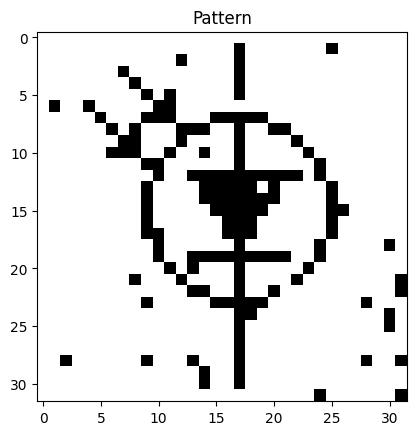

Epoch: 1 (step 1100)


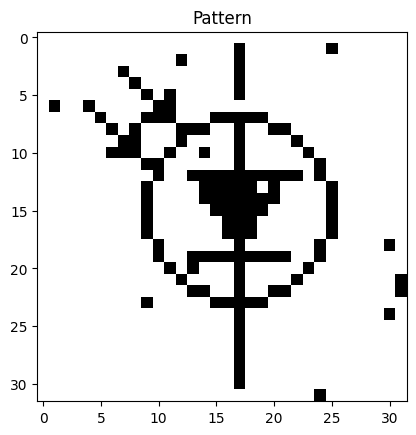

Epoch: 1 (step 1200)


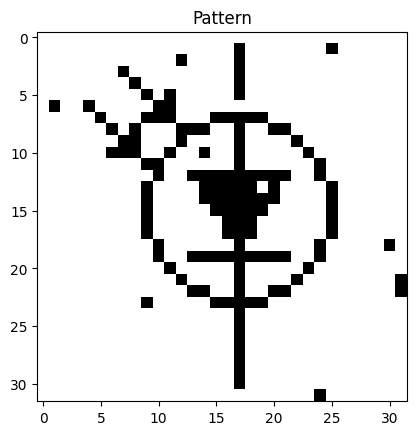

Epoch: 1 (step 1300)


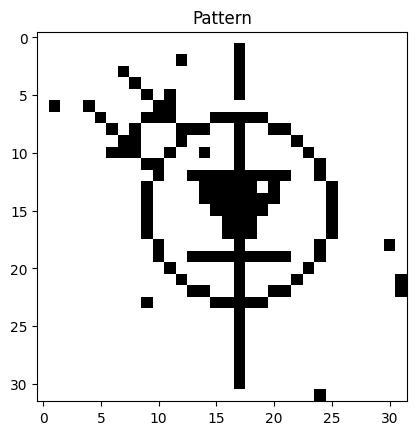

Epoch: 1 (step 1400)


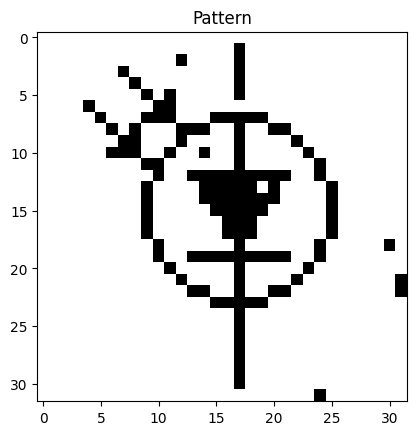

Epoch: 1 (step 1500)


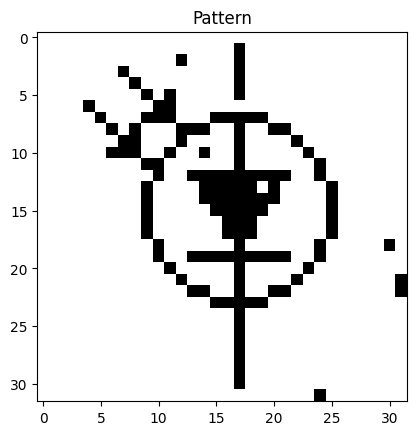

Epoch: 1 (step 1600)


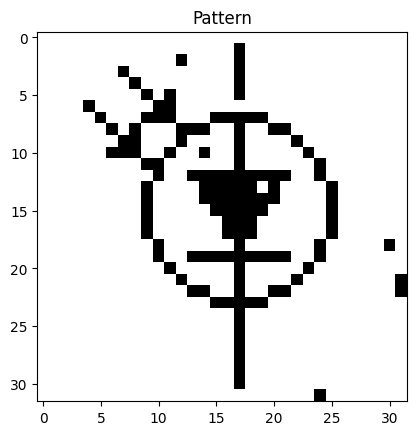

Epoch: 1 (step 1700)


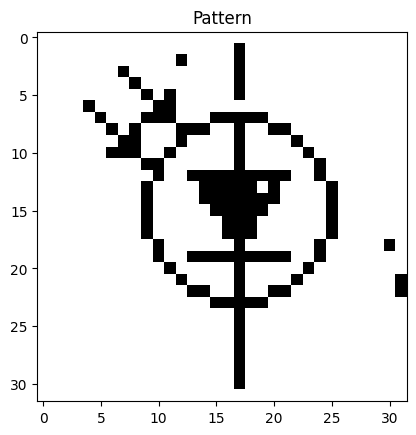

Epoch: 1 (step 1800)


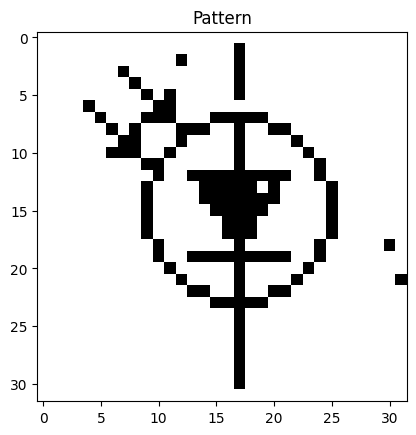

Epoch: 1 (step 1900)


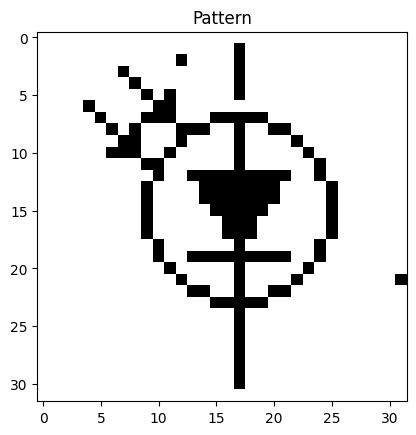

Epoch: 1 (step 2000)


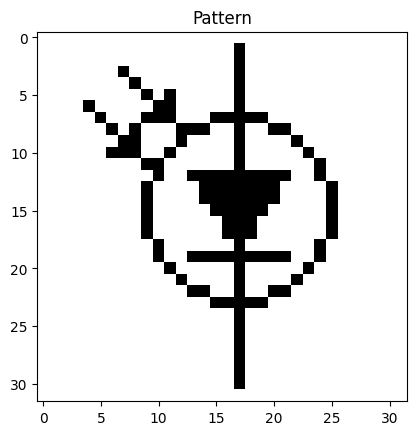

Epoch: 2 (step 2100)


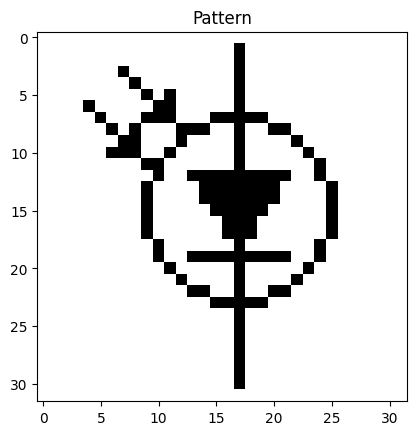

Epoch: 2 (step 2200)


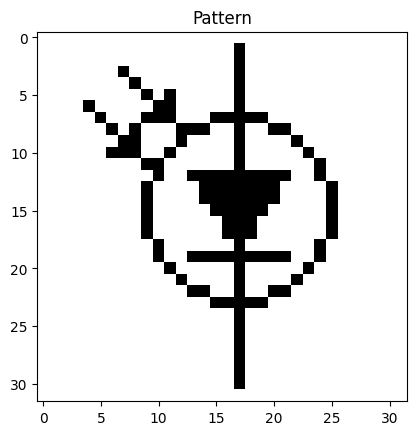

Epoch: 2 (step 2300)


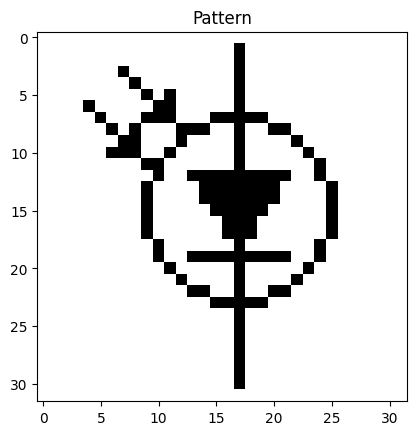

Epoch: 2 (step 2400)


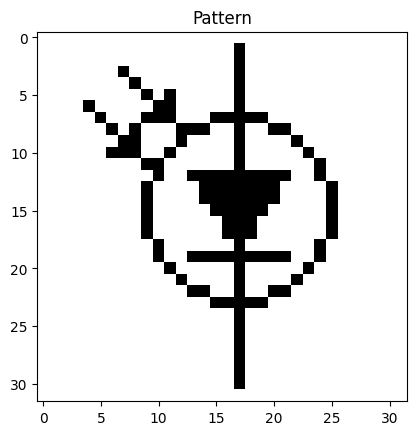

Epoch: 2 (step 2500)


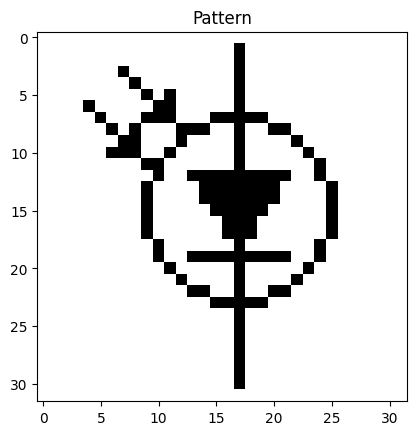

Epoch: 2 (step 2600)


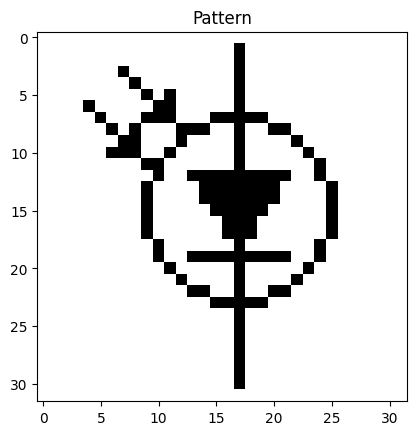

Epoch: 2 (step 2700)


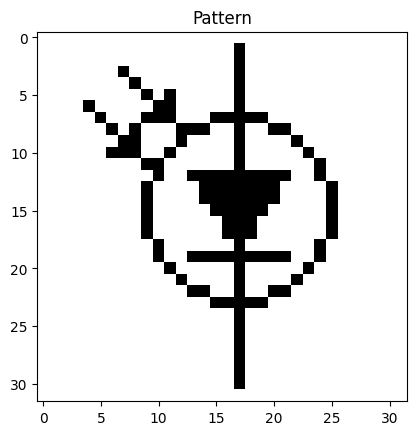

Epoch: 2 (step 2800)


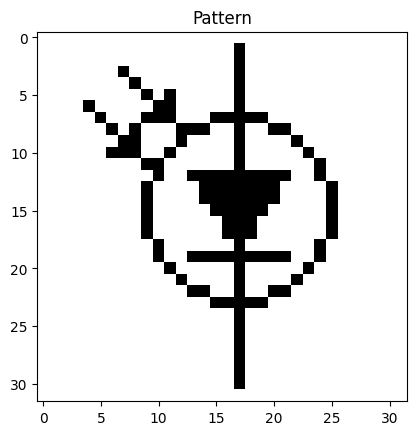

Epoch: 2 (step 2900)


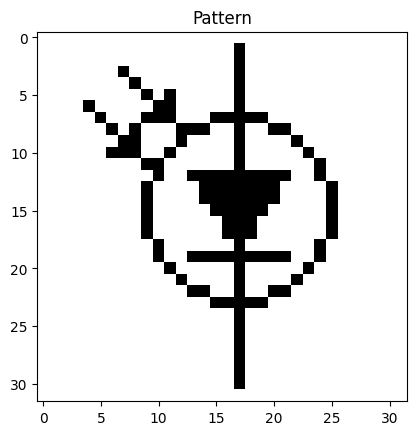

Epoch: 2 (step 3000)


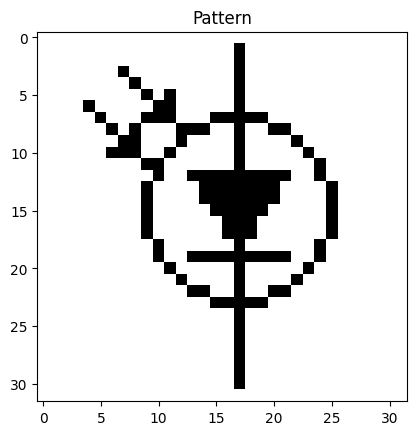

In [16]:
h.recall(data[10].reshape(1, 1024))

for i, partial in enumerate(h.detailed_history):
    if i % 100 == 0:
        print(f"Epoch: {partial['epoch']} (step {i})")
        display_pattern(partial["state"], f"./imgs/sequential_p11_to_p2_{i}.pdf")